In [ ]:
pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.8 MB/s eta 0:00:00


data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

In [ ]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model

import warnings # ignores pink warnings
warnings.filterwarnings('ignore')

* **Did some surfing and found some websites offering malicious links.** And found some datasets

* **Loading the main dataset.**

In [ ]:
phish_data = pd.read_csv('phishing_site_urls.csv')

#### * You can download dataset from my **Kaggle** Profile <a href='https://www.kaggle.com/taruntiwarihp/phishing-site-urls'>here</a>

In [ ]:
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [ ]:
phish_data.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [ ]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


* **About dataset**
* Data is containg 5,49,346 unique entries.
* There are two columns.
* Label column is prediction col which has 2 categories
    A. Good - which means the urls is not containing malicious stuff and **this site is not a Phishing Site.**
    B. Bad - which means the urls contains malicious stuffs and **this site isa Phishing Site.**
* There is no missing value in the dataset.

In [ ]:
phish_data.isnull().sum() # there is no missing values

,0
URL,0
Label,0


* **Since it is classification problems so let's see the classes are balanced or imbalances**

In [ ]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())

In [ ]:
# Check the column names in the dataset
print(phish_data.columns)
print(label_counts.head())



Index(['URL', 'Label'], dtype='object')
        count
Label        
good   392924
bad    156422


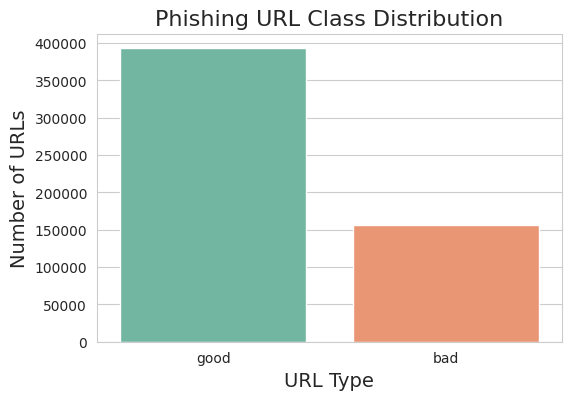

In [ ]:
# Create a dataframe of class counts
label_counts = phish_data['Label'].value_counts().reset_index()

# Rename the columns for better clarity
label_counts.columns = ['URL_Type', 'Count']

# Set the size of the plot for better visualization
plt.figure(figsize=(6, 4))

# Visualizing the target column
sns.set_style('whitegrid')
sns.barplot(x='URL_Type', y='Count', data=label_counts, palette='Set2')

# Add labels and title to make the plot clearer
plt.xlabel('URL Type', fontsize=14)
plt.ylabel('Number of URLs', fontsize=14)
plt.title('Phishing URL Class Distribution', fontsize=16)

# Display the plot
plt.show()


### Preprocessing

* **Now that we have the data, we have to vectorize our URLs. I used CountVectorizer and gather words using tokenizer, since there are words in urls that are more important than other words e.g ‘virus’, ‘.exe’ ,’.dat’ etc. Lets convert the URLs into a vector form.**

#### RegexpTokenizer
* A tokenizer that splits a string using a regular expression, which matches either the tokens or the separators between tokens.

In [ ]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [ ]:
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [ ]:
# this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[0]) # using first row

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [ ]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 8.379475206000052 sec


In [ ]:
phish_data.sample(5)

,URL,Label,text_tokenized
525285,37.57.144.177/Ares13.zip,bad,"[Ares, zip]"
380700,lyricsmode.com/lyrics/b/bayside/the_walking_wo...,good,"[lyricsmode, com, lyrics, b, bayside, the, wal..."
109600,thephysicsforum.com/bank-of-america.security-w...,bad,"[thephysicsforum, com, bank, of, america, secu..."
147316,backofthenet.wikia.com/wiki/Samuel_Eto%27o,good,"[backofthenet, wikia, com, wiki, Samuel, Eto, o]"
76242,stackoverflow.com/feeds/tag/node.js,good,"[stackoverflow, com, feeds, tag, node, js]"


#### SnowballStemmer
* Snowball is a small string processing language, gives root words

In [ ]:
stemmer = SnowballStemmer("english") # choose a language

In [ ]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 56.39410717999999 sec


In [ ]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
172407,en.wikipedia.org/wiki/Category:1972_deaths,good,"[en, wikipedia, org, wiki, Category, deaths]","[en, wikipedia, org, wiki, categori, death]"
335512,fanpop.com/spots/alias/videos/70776/title/alia...,good,"[fanpop, com, spots, alias, videos, title, ali...","[fanpop, com, spot, alia, video, titl, alia, s..."
409495,onesource.com/free/Daniel-Bigras/People/Profil...,good,"[onesource, com, free, Daniel, Bigras, People,...","[onesourc, com, free, daniel, bigra, peopl, pr..."
158255,christinariccisexvideo660.typepad.com/,good,"[christinariccisexvideo, typepad, com]","[christinariccisexvideo, typepad, com]"
354457,hotelplanner.com/Hotels/28499-NEAR-Lake-Merritt,good,"[hotelplanner, com, Hotels, NEAR, Lake, Merritt]","[hotelplann, com, hotel, near, lake, merritt]"


In [ ]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.34710276600003453 sec


In [ ]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
263958,123people.com/c/michel+lacombe,good,"[people, com, c, michel, lacombe]","[peopl, com, c, michel, lacomb]",peopl com c michel lacomb
29647,go2012.sslblindado.com/,bad,"[go, sslblindado, com]","[go, sslblindado, com]",go sslblindado com
275821,amazon.com/LT-Tackling-Quarterbacks-Beyond-Foo...,good,"[amazon, com, LT, Tackling, Quarterbacks, Beyo...","[amazon, com, lt, tackl, quarterback, beyond, ...",amazon com lt tackl quarterback beyond footbal dp
411016,oursportscentral.com/sports/?t_id=2408,good,"[oursportscentral, com, sports, t, id]","[oursportscentr, com, sport, t, id]",oursportscentr com sport t id
8064,www.buyorsellcars.info/wp-content/uploads/2012...,bad,"[www, buyorsellcars, info, wp, content, upload...","[www, buyorsellcar, info, wp, content, upload,...",www buyorsellcar info wp content upload servic...


### Visualization
**1. Visualize some important keys using word cloud**

In [ ]:
#sliceing classes
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [ ]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [ ]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


* create a function to visualize the important keys from url

In [ ]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0),
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size,
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)

    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green',
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

In [ ]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

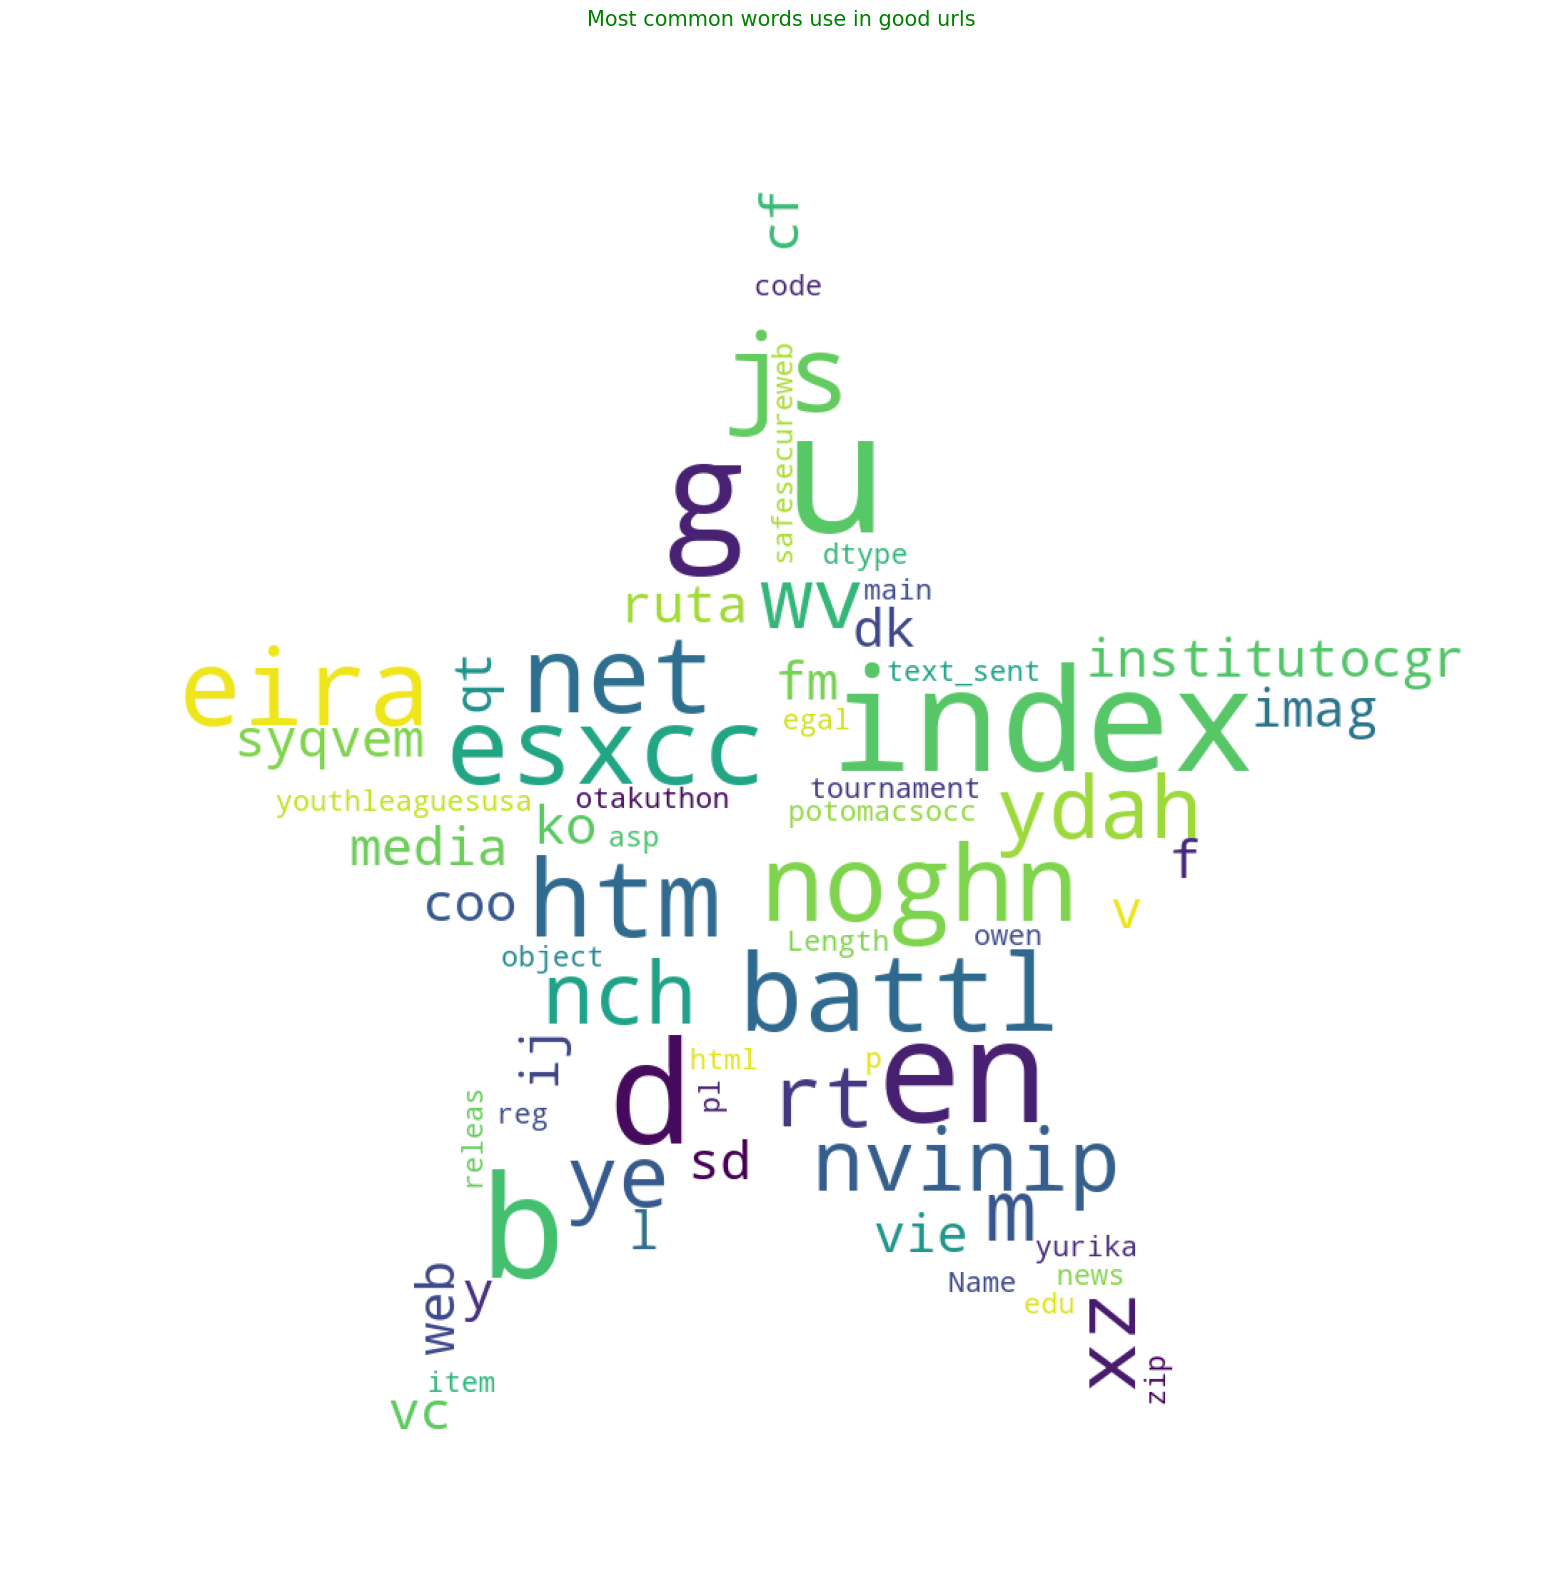

In [ ]:
common_text = str(data)
common_mask = np.array(Image.open('star.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120,
               title = 'Most common words use in good urls', title_size=15)

In [ ]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

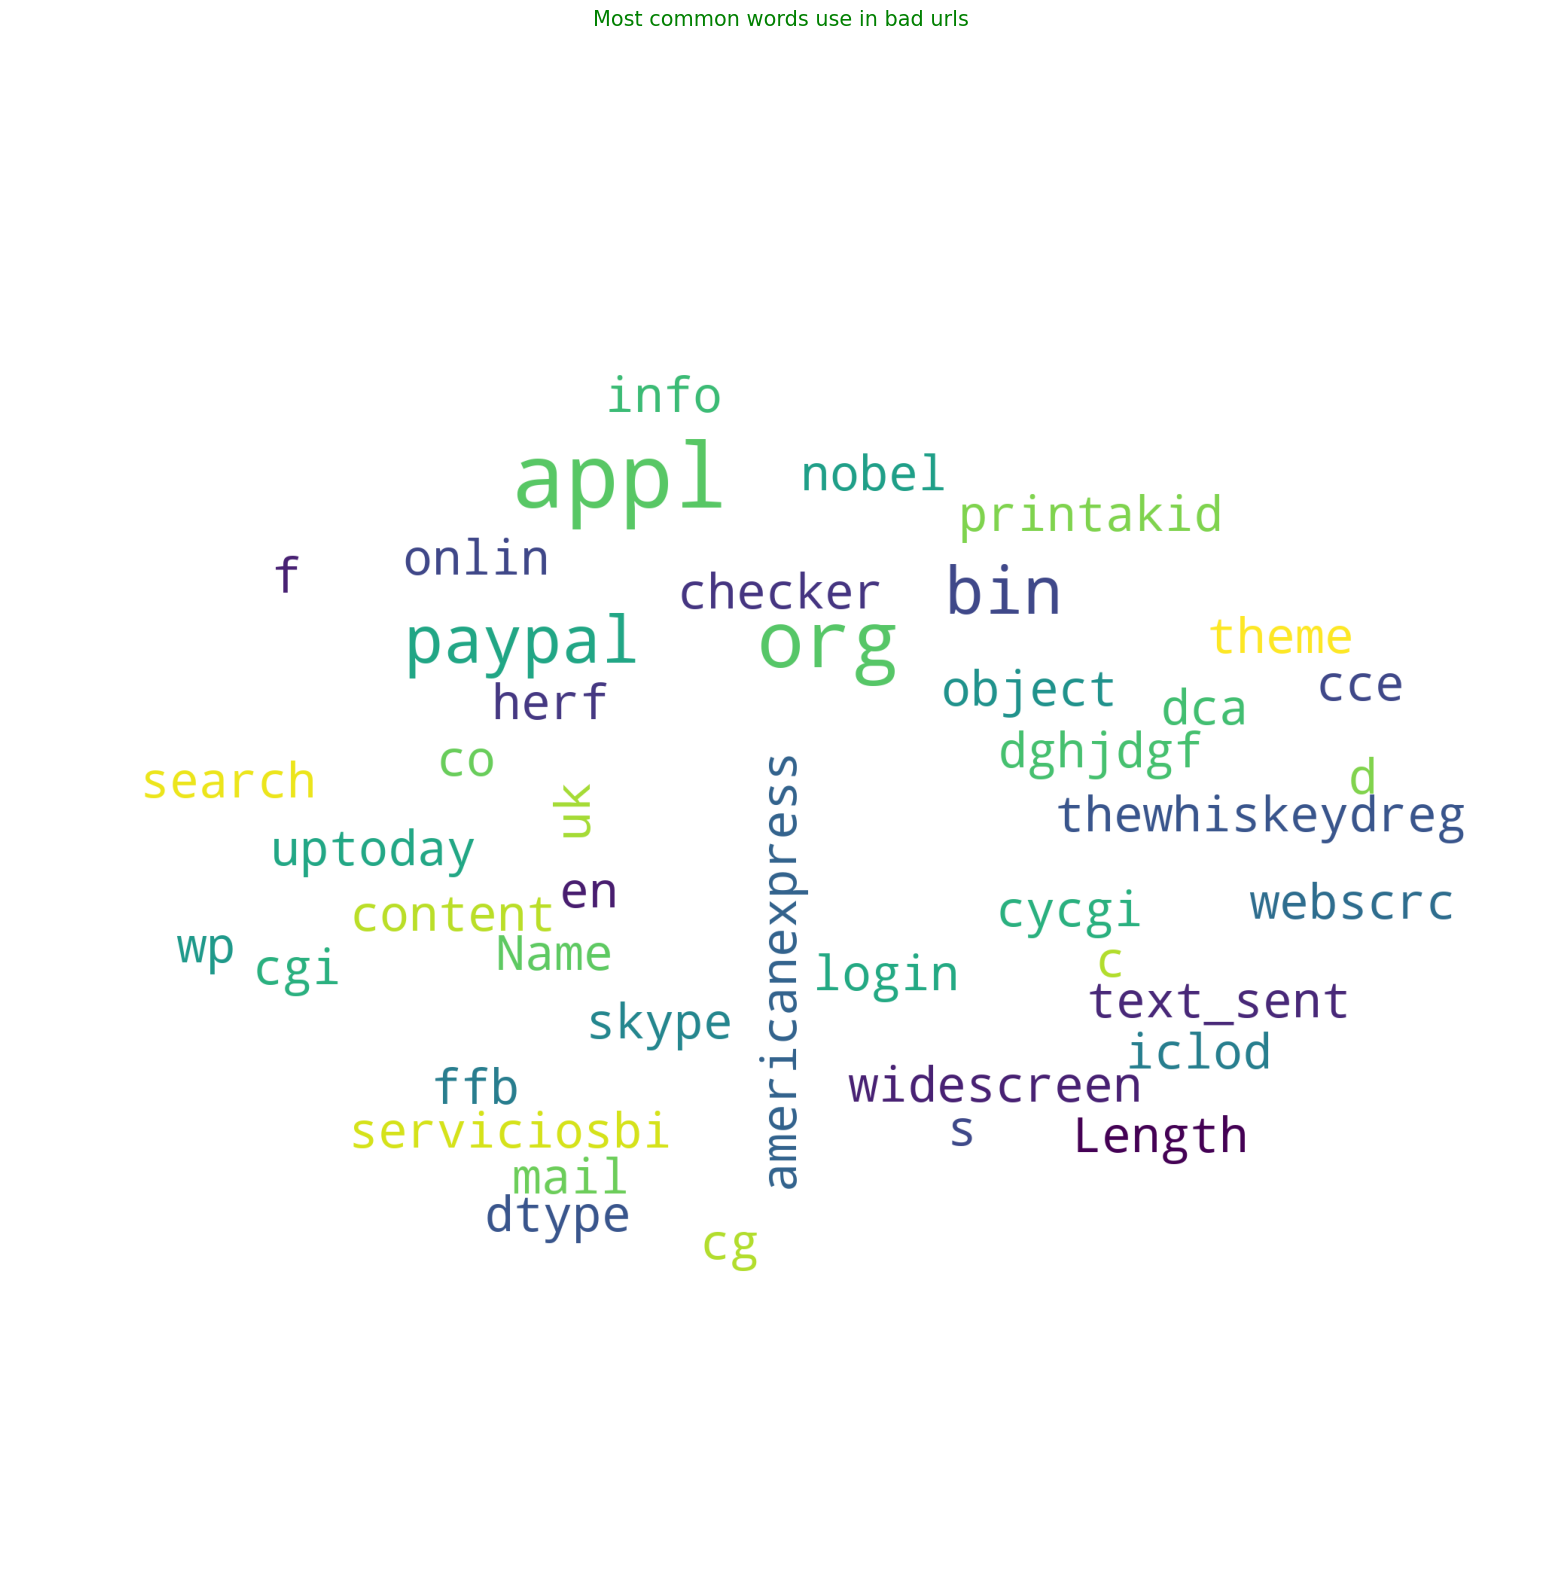

In [ ]:
common_text = str(data)
common_mask = np.array(Image.open('comment.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120,
               title = 'Most common words use in bad urls', title_size=15)

**2. Visualize internal links, it will shows all redirect links.**

#### Scrape any website
* First, setting up the Chrome webdriver so we can scrape dynamic web pages.

#### Chrome webdriver
* WebDriver tool use for automated testing of webapps across many browsers. It provides capabilities for navigating to web pages, user input and more

In [ ]:
!apt-get update # To update the system package list
!apt install -y chromium-chromedriver # To install Chromium and ChromeDriver
!pip install selenium # To install Selenium


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1

In [ ]:
import os
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

# Set environment variables for Chrome and ChromeDriver
os.environ['PATH'] += ":/usr/lib/chromium-browser/"
os.environ['PATH'] += ":/usr/lib/chromium-browser/chromedriver"

# Set up Chrome options for headless mode
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run Chrome in headless mode
chrome_options.add_argument("--no-sandbox")  # Bypass OS security model
chrome_options.add_argument("--disable-dev-shm-usage")  # Overcome limited resource problems

# Initialize the Chrome browser with the correct driver
browser = webdriver.Chrome(options=chrome_options)
"""
# Example: Open a website
browser.get("https://www.example.com")

# Print the title of the page to verify it's working
print(browser.title)

# Close the browser
browser.quit()
"""

'\n# Example: Open a website\nbrowser.get("https://www.example.com")\n\n# Print the title of the page to verify it\'s working\nprint(browser.title)\n\n# Close the browser\nbrowser.quit()\n'

**You can download chromedriver.exe from my github <a href='https://github.com/taruntiwarihp/dataSets/blob/master/chromedriver_win32.zip'>here</a>**

* After set up the Chrome driver create two lists.
* First list named list_urls holds all the pages you’d like to scrape.
* Second, create an empty list where you’ll append links from each page.


In [ ]:
list_urls = ['https://www.ezeephones.com/','https://www.ezeephones.com/about-us'] #here i take phishing sites
links_with_text = []

* I took some phishing site to see were the hackers redirect(on different link) us.
* Use the BeautifulSoup library to extract only relevant hyperlinks for Google, i.e. links only with '<'a'>' tags with href attributes.

#### BeautifulSoup
* It is use for getting data out of HTML, XML, and other markup languages.

In [ ]:
import requests
from bs4 import BeautifulSoup

list_urls = ['https://www.amazon.in/','https://www.aboutamazon.in/']  # Replace with your actual list of URLs
links_with_text = []

for url in list_urls:
    try:
        # Send an HTTP request to the URL
        response = requests.get(url)

        # Check if the request was successful
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, "html.parser")

            # Extract all 'a' tags (links)
            for line in soup.find_all('a'):
                href = line.get('href')
                if href:  # Only append if 'href' is not None
                    links_with_text.append([url, href])
        else:
            print(f"Failed to access {url}, status code: {response.status_code}")
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")

# Display the extracted links
for item in links_with_text:
    print(f"URL: {item[0]}, Link: {item[1]}")


Failed to access https://www.amazon.in/, status code: 503
URL: https://www.aboutamazon.in/, Link: https://www.aboutamazon.in/about-us
URL: https://www.aboutamazon.in/, Link: https://www.aboutamazon.in/about-us
URL: https://www.aboutamazon.in/, Link: https://www.aboutamazon.in/about-us/leadership-principles
URL: https://www.aboutamazon.in/, Link: https://www.aboutamazon.in/about-us/awards-recognition
URL: https://www.aboutamazon.in/, Link: https://www.aboutamazon.in/about-us/facts
URL: https://www.aboutamazon.in/, Link: https://www.aboutamazon.in/what-we-do
URL: https://www.aboutamazon.in/, Link: https://www.aboutamazon.in/what-we-do
URL: https://www.aboutamazon.in/, Link: https://www.aboutamazon.in/what-we-do/amazon-india
URL: https://www.aboutamazon.in/, Link: https://www.aboutamazon.in/what-we-do/delivery-logistics
URL: https://www.aboutamazon.in/, Link: https://www.aboutamazon.in/what-we-do/devices-services
URL: https://www.aboutamazon.in/, Link: https://www.aboutamazon.in/what-we-d

#### Turn the URL’s into a Dataframe
* After you get the list of your websites with hyperlinks turn them into a Pandas DataFrame with columns “from” (URL where the link resides) and “to” (link destination URL)

In [ ]:
df.head()

,from,to
0,https://www.aboutamazon.in/,https://www.aboutamazon.in/about-us
1,https://www.aboutamazon.in/,https://www.aboutamazon.in/about-us
2,https://www.aboutamazon.in/,https://www.aboutamazon.in/about-us/leadership...
3,https://www.aboutamazon.in/,https://www.aboutamazon.in/about-us/awards-rec...
4,https://www.aboutamazon.in/,https://www.aboutamazon.in/about-us/facts


In [ ]:
print(df.head())
print(df.info())  # Check if there are valid values in the DataFrame


Empty DataFrame
Columns: [from, to]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   from    0 non-null      object
 1   to      0 non-null      object
dtypes: object(2)
memory usage: 124.0+ bytes
None


                          from  \
0  https://www.aboutamazon.in/   
1  https://www.aboutamazon.in/   
2  https://www.aboutamazon.in/   
3  https://www.aboutamazon.in/   
4  https://www.aboutamazon.in/   

                                                  to  
0                https://www.aboutamazon.in/about-us  
1                https://www.aboutamazon.in/about-us  
2  https://www.aboutamazon.in/about-us/leadership...  
3  https://www.aboutamazon.in/about-us/awards-rec...  
4          https://www.aboutamazon.in/about-us/facts  


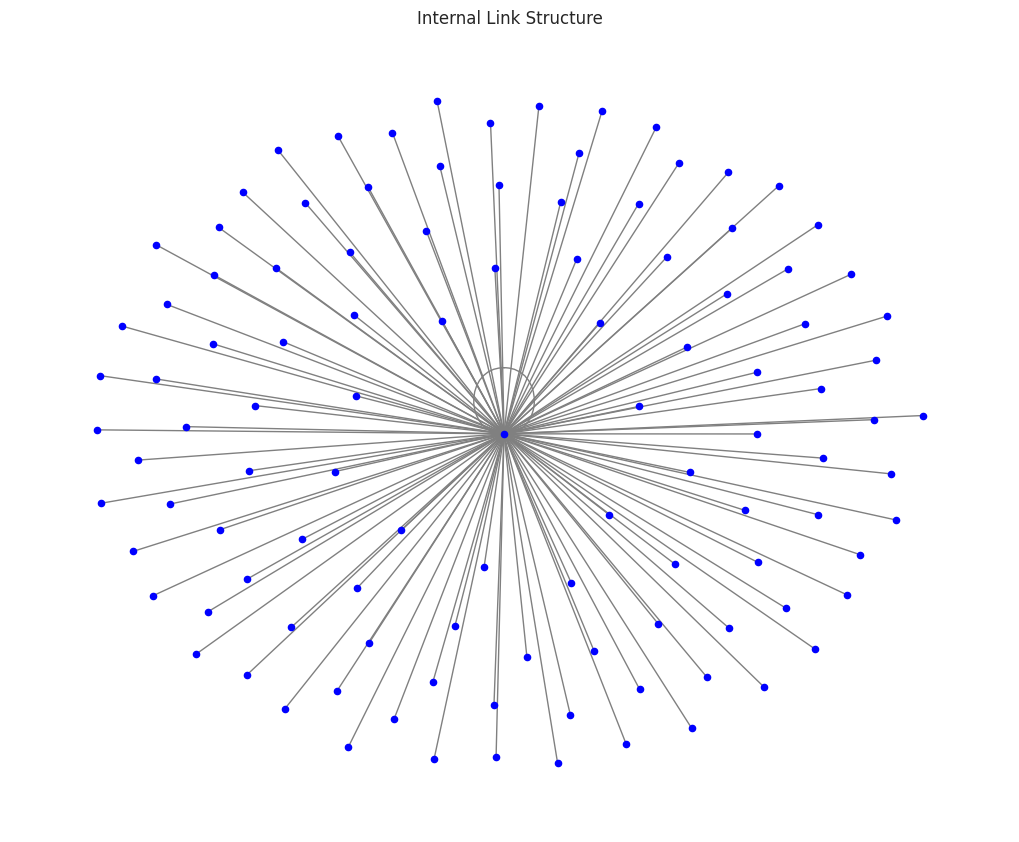

In [ ]:
# Step 1: Create a DataFrame from the links_with_text list
df = pd.DataFrame(links_with_text, columns=["from", "to"])

# Display the first few rows of the DataFrame
print(df.head())

# Step 2: Draw a graph using NetworkX
# Create a graph from the DataFrame
GA = nx.from_pandas_edgelist(df, source="from", target="to")

# Step 3: Visualize the graph
plt.figure(figsize=(10, 8))  # Set the size of the plot
nx.draw(GA, with_labels=False, node_size=20, node_color="blue", edge_color="gray")
plt.title("Internal Link Structure")
plt.show()

In [ ]:
#create cv object
cv = CountVectorizer()

In [ ]:
#help(CountVectorizer())

In [ ]:
feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemed

In [ ]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### * Spliting the data

In [ ]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

### LogisticRegression
* Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [ ]:
# create lr object
lr = LogisticRegression()

In [ ]:
lr.fit(trainX,trainY)

LogisticRegression()

In [ ]:
lr.score(testX,testY)

0.9645325003458646

.*** Logistic Regression is giving 96% accuracy, Now we will store scores in dict to see which model perform best**

In [ ]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9786024091706734
Testing Accuracy : 0.9645325003458646

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.96      0.93     36270
        Good       0.99      0.96      0.98    101067

    accuracy                           0.96    137337
   macro avg       0.95      0.96      0.96    137337
weighted avg       0.97      0.96      0.96    137337


CONFUSION MATRIX


<Axes: >

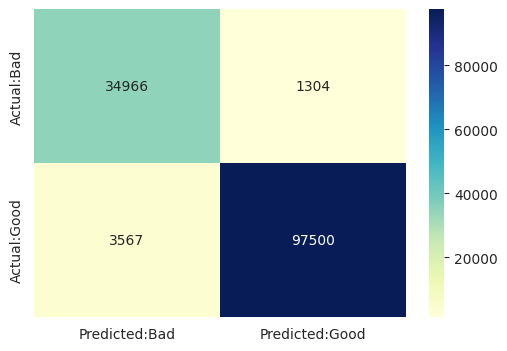

In [ ]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

### MultinomialNB
* Applying Multinomial Naive Bayes to NLP Problems. Naive Bayes Classifier Algorithm is a family of probabilistic algorithms based on applying Bayes' theorem with the “naive” assumption of conditional independence between every pair of a feature.

In [ ]:
# create mnb object
mnb = MultinomialNB()

In [ ]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [ ]:
mnb.score(testX,testY)

0.9578919009443922

*** MultinomialNB gives us 95% accuracy**  

In [ ]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9738962012965736
Testing Accuracy : 0.9578919009443922

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.92      0.93      0.92     37790
        Good       0.97      0.97      0.97     99547

    accuracy                           0.96    137337
   macro avg       0.94      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


<Axes: >

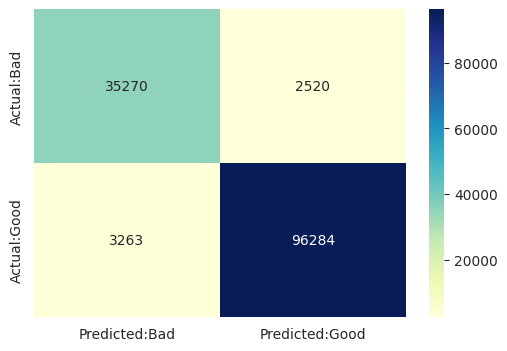

In [ ]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

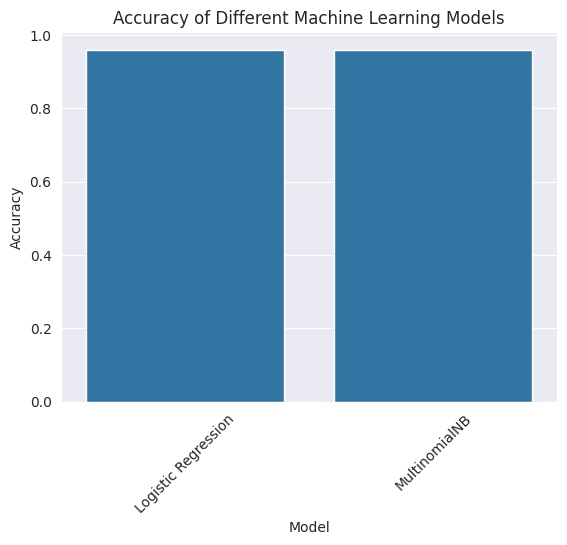

In [ ]:
import seaborn as sns
import pandas as pd

# Assuming 'Scores_ml' is a dictionary containing the accuracy values
acc = pd.DataFrame.from_dict(Scores_ml, orient='index', columns=['Accuracy'])

# Set the style for the plot
sns.set_style('darkgrid')

# Create the bar plot with correct syntax
sns.barplot(x=acc.index, y=acc['Accuracy'])

# Optionally, add labels and a title for clarity
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Machine Learning Models')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()


*** So, Logistic Regression is the best fit model, Now we make sklearn pipeline using Logistic Regression**

In [ ]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+) -- these tolenizers giving me low accuray

In [ ]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [ ]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [ ]:
pipeline_ls.score(testX,testY)

0.9668115657106242

Training Accuracy : 0.9806751794256922
Testing Accuracy : 0.9668115657106242

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36558
        Good       0.99      0.97      0.98    100779

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<Axes: >

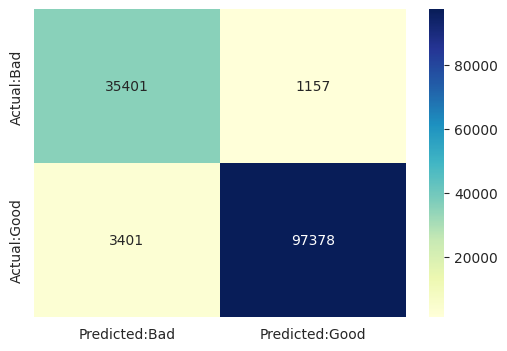

In [ ]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [ ]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [ ]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9668115657106242


***That’s it. See, it's that simple yet so effective. We get an accuracy of 98%. That’s a very high value for a machine to be able to detect a malicious URL with. Want to test some links to see if the model gives good predictions? Sure. Let's do it**

In [ ]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good' 'good']


https://research.aalto.fi/en/datasets/phishstorm-phishing-legitimate-url-dataset

In [ ]:
import pickle

# Load the trained model from the pickle file
loaded_model = pickle.load(open('phishing.pkl', 'rb'))

def preprocess_and_predict(url):
    # This function will preprocess the entered URL and predict its class

    # Preprocess the URL (similar to what was done in training)
    # No need to manually tokenize or stem since CountVectorizer will handle it within the pipeline

    # Convert the URL into a list because the model expects a list of URLs
    url_list = [url]

    # Predict the class using the trained model pipeline
    prediction = loaded_model.predict(url_list)

    # Get the probability of the prediction for better insight
    prediction_proba = loaded_model.predict_proba(url_list)

    # Display the result
    if prediction[0] == 'bad':
        print(f"The entered URL: '{url}' is predicted to be a **Phishing URL**.")
    else:
        print(f"The entered URL: '{url}' is predicted to be a **Legitimate URL**.")

    # Display the probability of the prediction
    print(f"Prediction Confidence (Phishing vs Legitimate): {prediction_proba[0]}")

# Dynamically input a URL from the user
input_url = input("Enter a URL to check if it's phishing or legitimate: ")

# Call the function to preprocess and predict
preprocess_and_predict(input_url)


Enter a URL to check if it's phishing or legitimate: https://wellfound.com/jobs/2774950-sde-intern
The entered URL: 'https://wellfound.com/jobs/2774950-sde-intern' is predicted to be a **Phishing URL**.
Prediction Confidence (Phishing vs Legitimate): [0.54436975 0.45563025]
